Problem 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#initialize matrix A
def matrix_A(n):
    A = np.identity(n)
    for i in range(n):
        ti = -1 + 2*i/(n-1)
        for j in range(n):
            A[i][j] = ti**j
    return A
            

In [3]:
#initialize vector b
def vec_b(A, X):
    return np.dot(A, X)

In [4]:
#compute solution x
def X_comp(A, b):
    return np.linalg.solve(A, b)

In [5]:
#compute absolute error between x and x computed
def abs_err(x, x_comp):
    return np.linalg.norm(x-x_comp)
    

In [6]:
#compute the sigma_n
def sigma_n(A):
    U, s, V_t = np.linalg.svd(A)
    return s[-1]

In [85]:
#initialize the result matrix
res = np.zeros((21, 5))

In [86]:
#fill in the result matrix
#first column is n
#second column is absolute error
#third column is relative error
#fourth column is condition number of A
for n in range(10, 31):
    X = np.ones(n)
    A = matrix_A(n)
    b = vec_b(A, X)
    X_c = X_comp(A, b)
    sn = sigma_n(A)
    res[n-10][0] = int(n)
    res[n-10][1] = 1/sn
    res[n-10][2] = abs_err(X, X_c)
    res[n-10][3] = abs_err(X, X_c)*sn
    res[n-10][4] = np.linalg.norm(np.dot(A, X_c) - b)
    

In [87]:
#output the result table
df = pd.DataFrame(res, columns=['n', '1/sigma_n', '||𝑥−𝑥𝑐𝑜𝑚𝑝||2','||𝑥−𝑥𝑐𝑜𝑚𝑝||2*sigma_n', '||delta||2'])
df.set_index('n')

,1/sigma_n,||𝑥−𝑥𝑐𝑜𝑚𝑝||2,||𝑥−𝑥𝑐𝑜𝑚𝑝||2*sigma_n,||delta||2
n,,,,
10.0,1.173155e+03,3.800178e-13,3.239279e-16,1.460270e-15
11.0,3.301479e+03,6.458212e-13,1.956157e-16,1.260971e-15
12.0,9.372283e+03,2.160857e-12,2.305583e-16,4.735072e-15
13.0,2.680040e+04,1.083016e-11,4.041044e-16,1.807312e-15
14.0,7.711071e+04,1.977455e-11,2.564436e-16,2.328823e-15
15.0,2.230420e+05,2.509219e-11,1.124999e-16,3.599246e-15
16.0,6.481167e+05,1.150114e-10,1.774547e-16,4.377997e-15
17.0,1.890896e+06,2.760896e-10,1.460099e-16,3.738667e-15
18.0,5.536378e+06,4.197689e-09,7.582013e-16,2.315554e-15


From the above table, we can see that for each row, the value in column three is less than that in column four. Therefore, the computational results match part c.

In [10]:
from matplotlib import rc, rcParams
rcParams['font.size'] = 20
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.usetex'] = False
from matplotlib import image

In [11]:
# load image as pixel array
data = image.imread('AF-flag.jpg')
# summarize shape of the pixel array
print(data.shape)
# display the array of pixels as an image


(302, 452, 3)


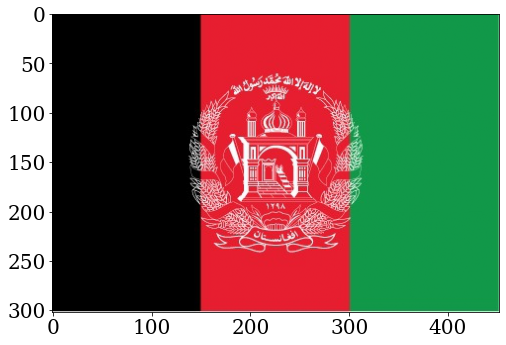

In [12]:
# convert to real and scale to [0,1]. Images stores as reals need tk be between [0,1]
data = data.astype(float)/255.0
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.show()

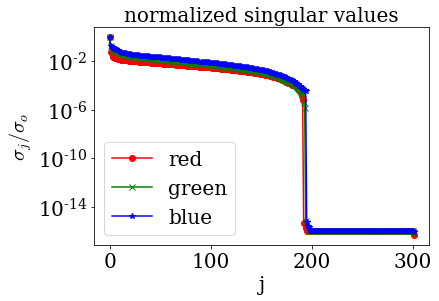

In [13]:
# compute SVDs or red, green, blue image matrices
Ur, Sr, Vtr = np.linalg.svd(data[:,:,0], full_matrices=False)
Ug, Sg, Vtg = np.linalg.svd(data[:,:,1], full_matrices=False)
Ub, Sb, Vtb = np.linalg.svd(data[:,:,2], full_matrices=False)

plt.semilogy(Sr/Sr[0], marker='o', color = 'red')
plt.semilogy(Sg/Sg[0], marker='x', color = 'green')
plt.semilogy(Sb/Sb[0], marker='*', color = 'blue')
plt.xlabel("j", fontsize="20")
plt.ylabel("$\sigma_j/\sigma_o$", fontsize="20")
plt.title("normalized singular values", fontsize="20")
plt.legend(['red', 'green', 'blue'])
plt.show()

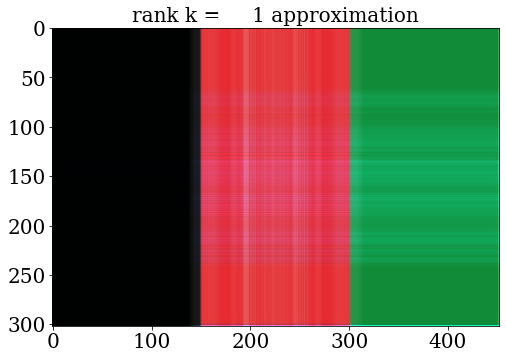

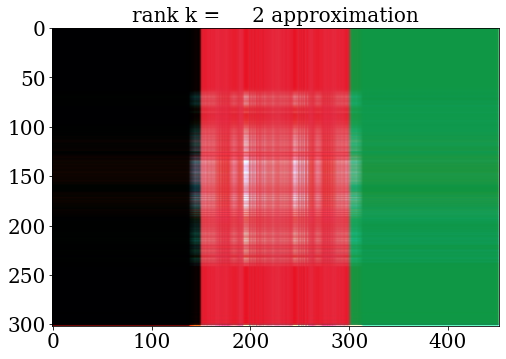

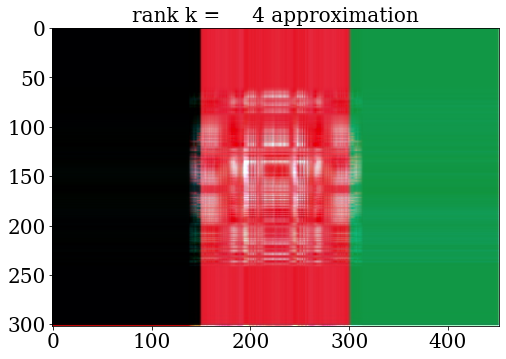

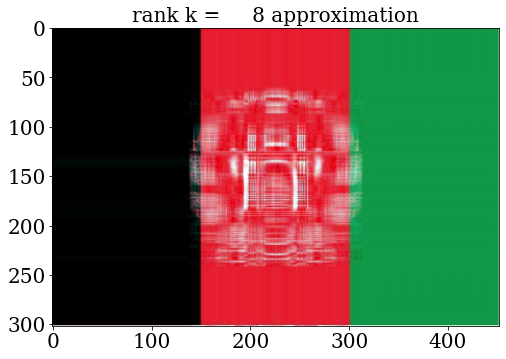

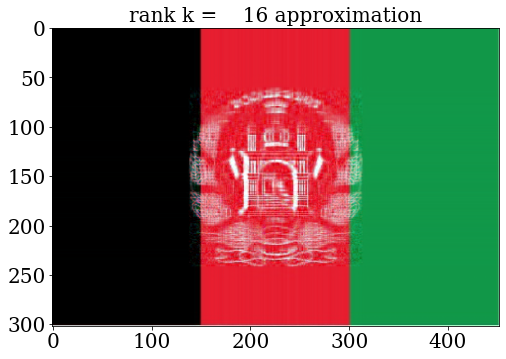

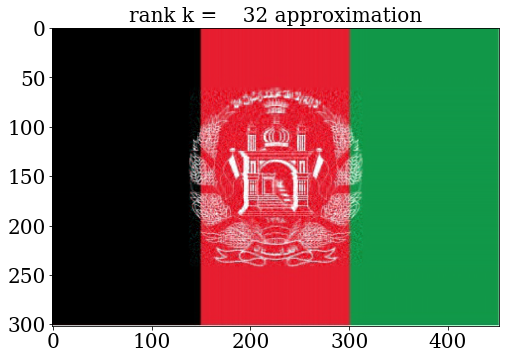

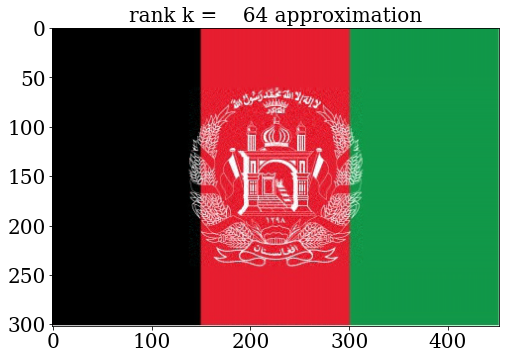

In [14]:
data_r = np.zeros(data.shape)

for i in range(6):
    r = 2**i
    data_r[:,:,0] = Ur[:,0:r] @ np.diag(Sr[0:r]) @ Vtr[0:r,:]
    data_r[:,:,1] = Ug[:,0:r] @ np.diag(Sg[0:r]) @ Vtg[0:r,:]
    data_r[:,:,2] = Ub[:,0:r] @ np.diag(Sb[0:r]) @ Vtb[0:r,:]
    
    data_r[data_r<0] = 0
    data_r[data_r>1] = 1
    
    plt.figure(figsize=(8,8))
    plt.imshow(data_r)
    plt.title('rank k = {0:5d} approximation'.format(r), fontsize="20")
    plt.show()

In this case, rank k = 32 is a good approximation

In [15]:
# load image as pixel array
data = image.imread('NL-flag.jpg')
# summarize shape of the pixel array
print(data.shape)
# display the array of pixels as an image


(334, 500, 3)


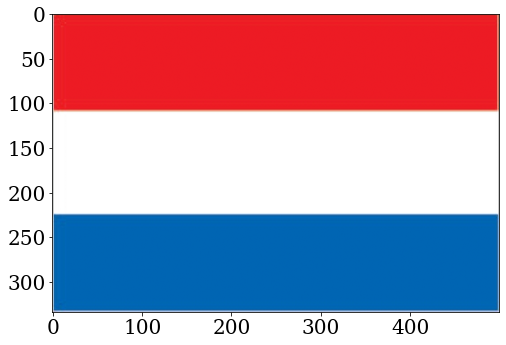

In [16]:
# convert to real and scale to [0,1]. Images stores as reals need tk be between [0,1]
data = data.astype(float)/255.0
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.show()

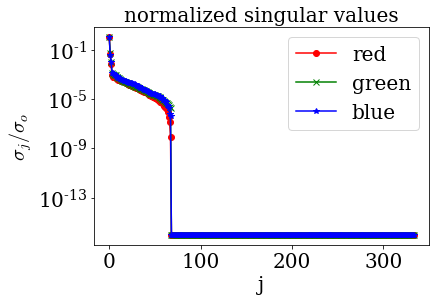

In [17]:
# compute SVDs or red, green, blue image matrices
Ur, Sr, Vtr = np.linalg.svd(data[:,:,0], full_matrices=False)
Ug, Sg, Vtg = np.linalg.svd(data[:,:,1], full_matrices=False)
Ub, Sb, Vtb = np.linalg.svd(data[:,:,2], full_matrices=False)

plt.semilogy(Sr/Sr[0], marker='o', color = 'red')
plt.semilogy(Sg/Sg[0], marker='x', color = 'green')
plt.semilogy(Sb/Sb[0], marker='*', color = 'blue')
plt.xlabel("j", fontsize="20")
plt.ylabel("$\sigma_j/\sigma_o$", fontsize="20")
plt.title("normalized singular values", fontsize="20")
plt.legend(['red', 'green', 'blue'])
plt.show()

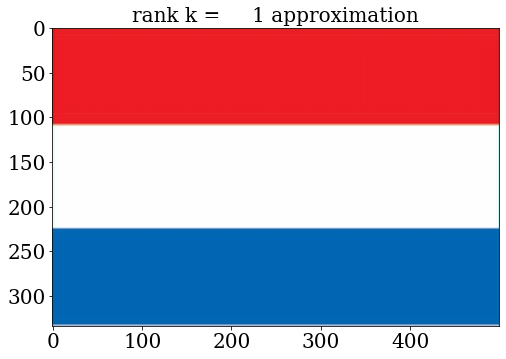

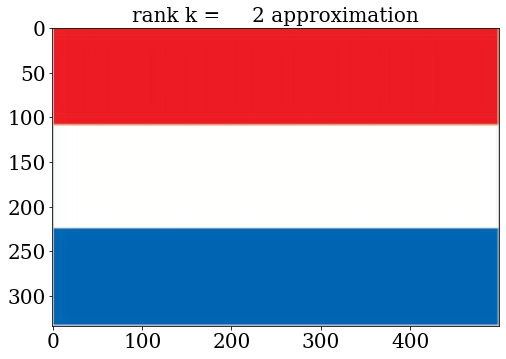

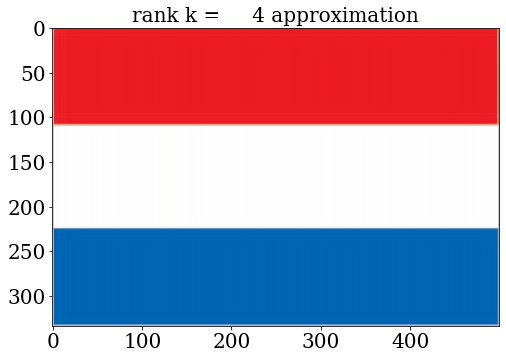

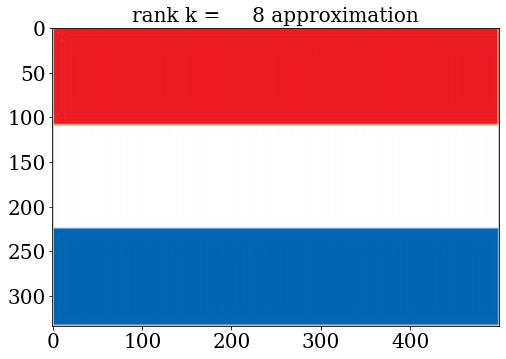

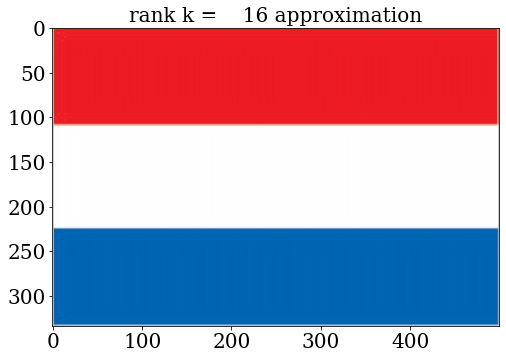

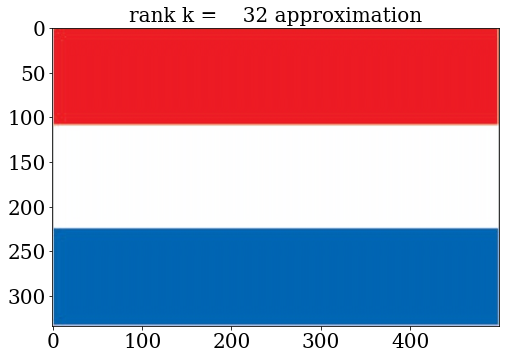

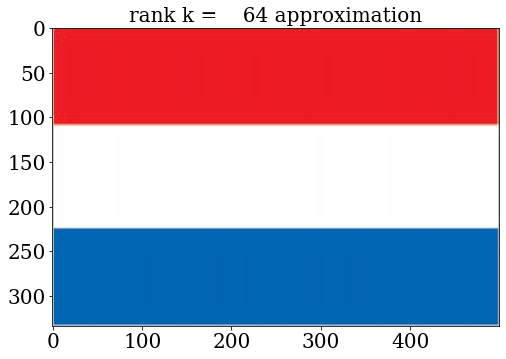

In [18]:
data_r = np.zeros(data.shape)

for i in range(3):
    r = 2**i
    data_r[:,:,0] = Ur[:,0:r] @ np.diag(Sr[0:r]) @ Vtr[0:r,:]
    data_r[:,:,1] = Ug[:,0:r] @ np.diag(Sg[0:r]) @ Vtg[0:r,:]
    data_r[:,:,2] = Ub[:,0:r] @ np.diag(Sb[0:r]) @ Vtb[0:r,:]
    
    data_r[data_r<0] = 0
    data_r[data_r>1] = 1
    
    plt.figure(figsize=(8,8))
    plt.imshow(data_r)
    plt.title('rank k = {0:5d} approximation'.format(r), fontsize="20")
    plt.show()

In this case, rank k = 1 is a good approximation

In [19]:
# load image as pixel array
data = image.imread('CH-flag.jpg')
# summarize shape of the pixel array
print(data.shape)
# display the array of pixels as an image


(268, 400, 3)


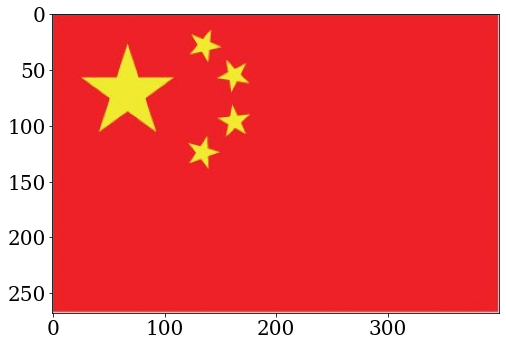

In [20]:
# convert to real and scale to [0,1]. Images stores as reals need tk be between [0,1]
data = data.astype(float)/255.0
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.show()

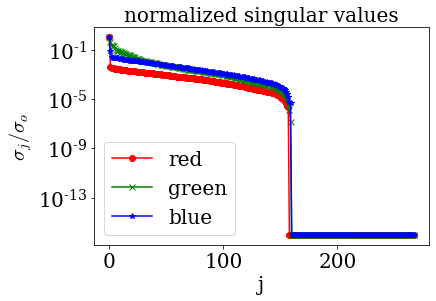

In [21]:
# compute SVDs or red, green, blue image matrices
Ur, Sr, Vtr = np.linalg.svd(data[:,:,0], full_matrices=False)
Ug, Sg, Vtg = np.linalg.svd(data[:,:,1], full_matrices=False)
Ub, Sb, Vtb = np.linalg.svd(data[:,:,2], full_matrices=False)

plt.semilogy(Sr/Sr[0], marker='o', color = 'red')
plt.semilogy(Sg/Sg[0], marker='x', color = 'green')
plt.semilogy(Sb/Sb[0], marker='*', color = 'blue')
plt.xlabel("j", fontsize="20")
plt.ylabel("$\sigma_j/\sigma_o$", fontsize="20")
plt.title("normalized singular values", fontsize="20")
plt.legend(['red', 'green', 'blue'])
plt.show()

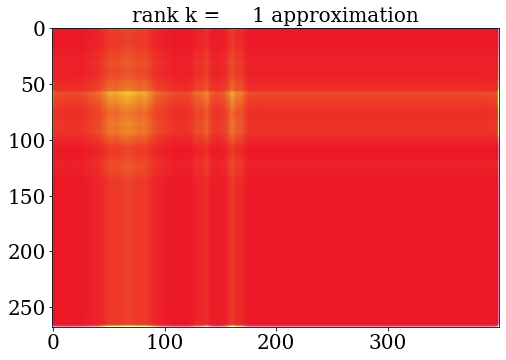

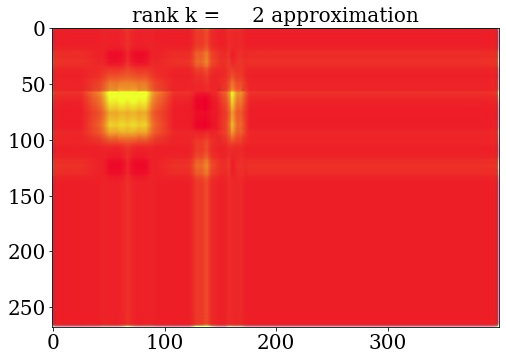

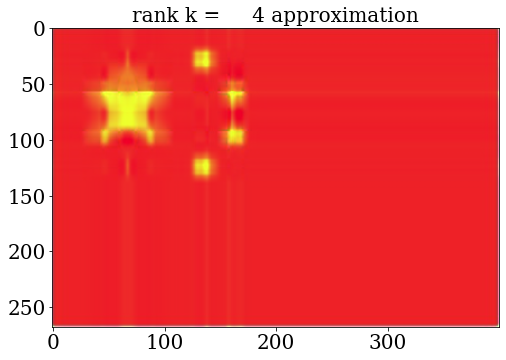

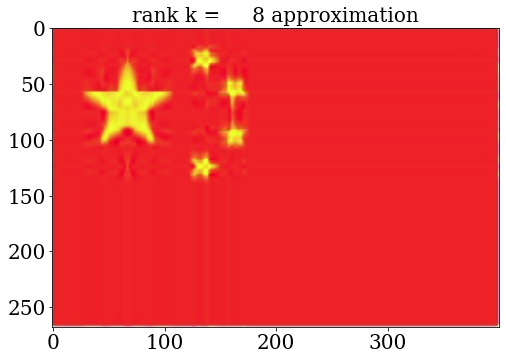

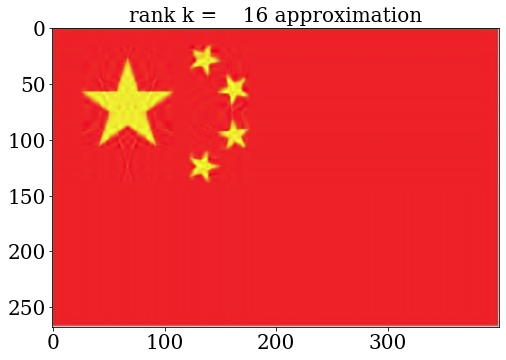

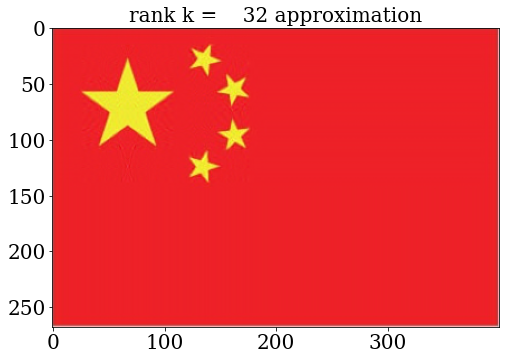

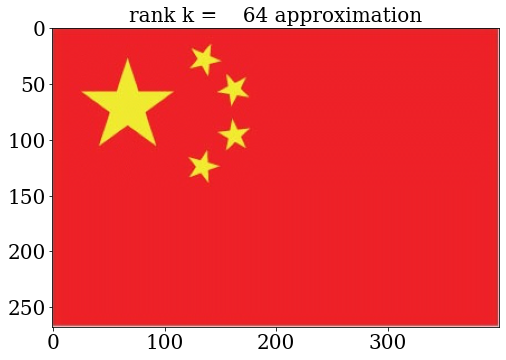

In [22]:
In this case, rank k = 32 is a good approximationdata_r = np.zeros(data.shape)

for i in range(6):
    r = 2**i
    data_r[:,:,0] = Ur[:,0:r] @ np.diag(Sr[0:r]) @ Vtr[0:r,:]
    data_r[:,:,1] = Ug[:,0:r] @ np.diag(Sg[0:r]) @ Vtg[0:r,:]
    data_r[:,:,2] = Ub[:,0:r] @ np.diag(Sb[0:r]) @ Vtb[0:r,:]
    
    data_r[data_r<0] = 0
    data_r[data_r>1] = 1
    
    plt.figure(figsize=(8,8))
    plt.imshow(data_r)
    plt.title('rank k = {0:5d} approximation'.format(r), fontsize="20")
    plt.show()

In this case, rank k = 16 is a good approximation

Problem 3

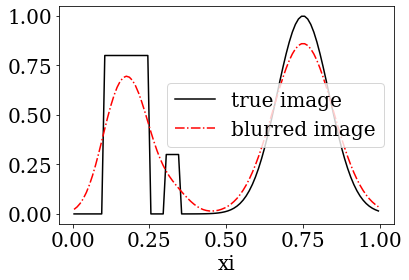

In [23]:
# specify problem
n = 100
h = 1/n
gamma = 0.05
xi = np.arange(1/2, n, dtype=float)/n
# true image
ftrue = np.exp( -(xi-0.75)**2 *70 )
ind = np.all([0.1<=xi, xi<=0.25], axis =0)  # indices for which xi in [0.1,0.25]
ftrue[ind] = 0.8
ind = np.all([0.3<=xi, xi<=0.35], axis =0)  # indices for which xi in [0.3,0.35]
ftrue[ind] = 0.3
# matrix K
C = 1/(gamma*np.sqrt(2*np.pi))
K = np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        K[i,j] = C*h* np.exp( -(xi[i]-xi[j])**2 / (2*gamma**2) )

gtrue = np.dot(K, ftrue)
                         
fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','blurred image'])
ax.set(xlabel='xi')

#fig.savefig("denoise_1d_ftrue")
plt.show()



In [24]:
# add error to true image
gerr = 0.001*np.multiply( 0.5 - np.random.uniform(0.05,0.5,n) , gtrue ) 
g = gtrue + gerr
gerror = 0.5*np.linalg.norm(gerr, 2)**2

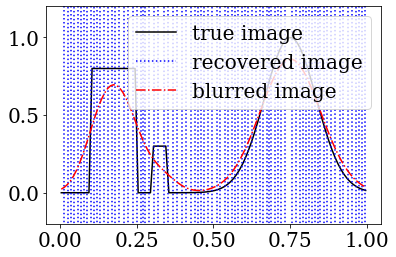

In [25]:
# naive reconstruction by solving linear system
f = np.linalg.solve(K, g)

fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, f, ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

In [26]:
U, s, V_t = np.linalg.svd(K)

In [27]:
x = np.linspace(1, 100, 100)

In [28]:
UGT = np.dot(U.T, gtrue)

In [29]:
UGE = np.dot(U.T, gerr)

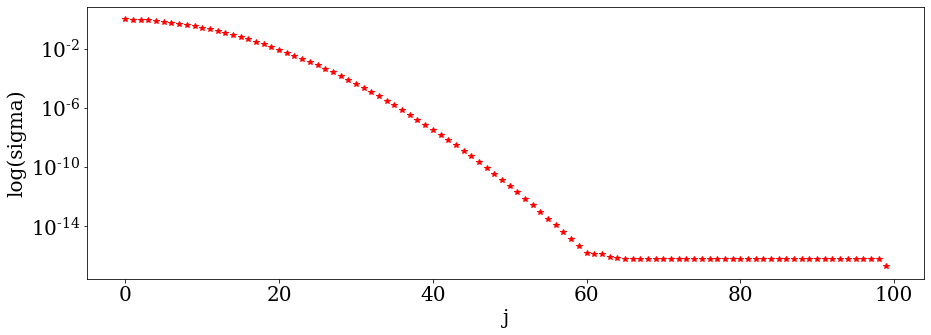

In [107]:
fig = plt.figure(figsize = (15, 5))
plt.semilogy(x, s, '*r')
plt.xlabel('j')
plt.ylabel('log(sigma)')
plt.show()

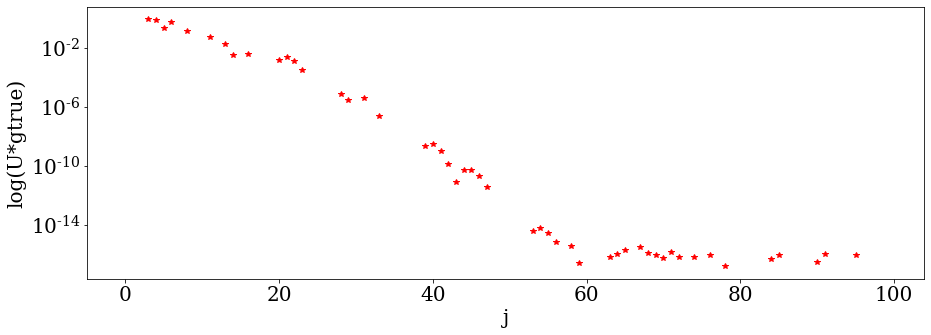

In [108]:
fig = plt.figure(figsize = (15, 5))
plt.semilogy(x, UGT, '*r')
plt.xlabel('j')
plt.ylabel('log(U*gtrue)')
plt.show()

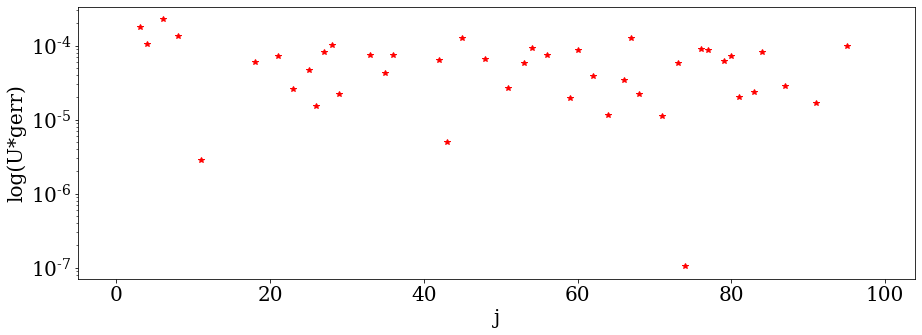

In [109]:
fig = plt.figure(figsize = (15, 5))
plt.semilogy(x, UGE, '*r')
plt.xlabel('j')
plt.ylabel('log(U*gerr)')
plt.show()

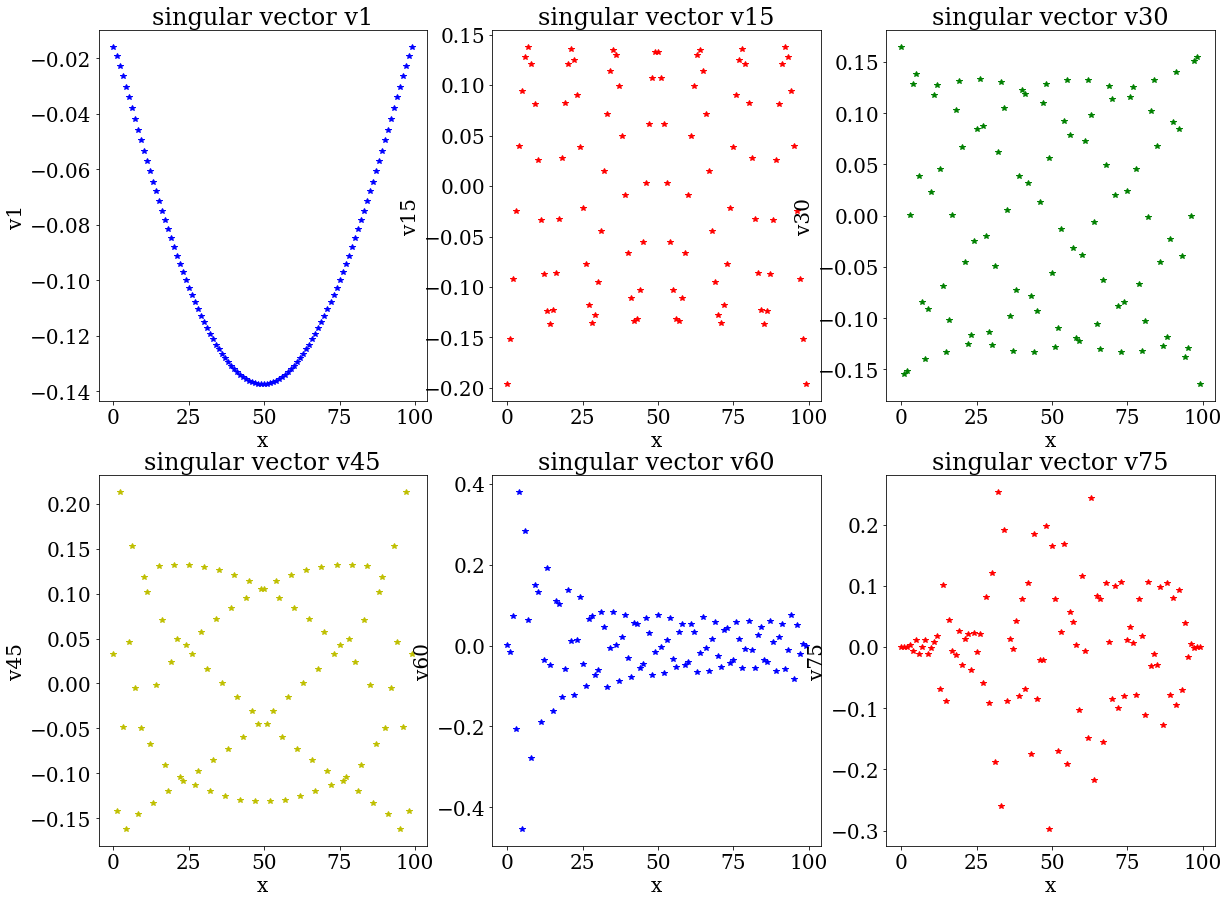

In [115]:
x = np.linspace(0, 99, 100)
fig, ax = plt.subplots(2, 3, figsize = (20, 15))
ax[0][0].plot(x, V_t[0], '*b')
ax[0][0].set_title('singular vector v1')
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('v1')

ax[0][1].plot(x, V_t[14], '*r')
ax[0][1].set_title('singular vector v15')
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('v15')

ax[0][2].plot(x, V_t[29], '*g')
ax[0][2].set_title('singular vector v30')
ax[0][2].set_xlabel('x')
ax[0][2].set_ylabel('v30')

ax[1][0].plot(x, V_t[44], '*y')
ax[1][0].set_title('singular vector v45')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('v45')

ax[1][1].plot(x, V_t[59], '*b')
ax[1][1].set_title('singular vector v60')
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('v60')

ax[1][2].plot(x, V_t[74], '*r')
ax[1][2].set_title('singular vector v75')
ax[1][2].set_xlabel('x')
ax[1][2].set_ylabel('v75')


plt.show()

In [104]:
s

array([9.89052161e-01, 9.56929311e-01, 9.05714304e-01, 8.38626905e-01,
       7.59686476e-01, 6.73312037e-01, 5.83915125e-01, 4.95537120e-01,
       4.11570646e-01, 3.34587561e-01, 2.66277569e-01, 2.07485342e-01,
       1.58322613e-01, 1.18326268e-01, 8.66336437e-02, 6.21508688e-02,
       4.36971842e-02, 3.01159783e-02, 2.03502392e-02, 1.34853386e-02,
       8.76522104e-03, 5.58931805e-03, 3.49729884e-03, 2.14765273e-03,
       1.29457832e-03, 7.66120567e-04, 4.45182361e-04, 2.54047127e-04,
       1.42392009e-04, 7.83984500e-05, 4.24064101e-05, 2.25374889e-05,
       1.17699207e-05, 6.04054025e-06, 3.04683368e-06, 1.51051541e-06,
       7.36095202e-07, 3.52614692e-07, 1.66052635e-07, 7.68754356e-08,
       3.49896377e-08, 1.56570863e-08, 6.88823001e-09, 2.97941464e-09,
       1.26700413e-09, 5.29714324e-10, 2.17726032e-10, 8.79766917e-11,
       3.49456322e-11, 1.36445564e-11, 5.23643883e-12, 1.97511981e-12,
       7.32150114e-13, 2.66665724e-13, 9.54417644e-14, 3.35622336e-14,
      

As we can see from the diagonal entries of sigma matrix, a lot of entries are nearly zero. Therefore, when we take the inverse of K = USV, we need to take the inverse of sigma matrix. However, taking the inverse of zero entries is meaningless and would drive the result entries insanely high. Thus, f = K^(-1)*g is a poor approximation of the true image.

ii

In [36]:

F_k = np.zeros([100, 100])

In [37]:
for j in range(100):
    for i in range(j):
        F_k[j] = F_k[j] + np.dot(np.dot(U.T[i], g)/s[i], V_t[i])

In [38]:
fknorm = np.zeros(100)

In [39]:
for i in range(100):
    fknorm[i] = np.linalg.norm(F_k[i])

In [40]:
kfg_norm = np.zeros(100)

In [41]:
for i in range(100):
    kfg_norm[i] = np.linalg.norm(np.dot(K, F_k[i]) - g)

In [42]:
F_k

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.10468738e-02,  6.14882605e-02,  7.26538054e-02, ...,
         7.26538054e-02,  6.14882605e-02,  5.10468738e-02],
       [ 2.27617708e-02,  2.75679787e-02,  3.27759034e-02, ...,
         1.12531707e-01,  9.54085423e-02,  7.93319769e-02],
       ...,
       [-8.82171281e+07,  1.01890918e+09, -5.07694369e+09, ...,
         3.01994429e+09, -7.08087916e+08,  5.89258687e+07],
       [-8.82171281e+07,  1.03447896e+09, -5.22130369e+09, ...,
         4.05508965e+09, -9.17800669e+08,  7.86570124e+07],
       [-8.82171281e+07,  9.99075098e+08, -4.85714706e+09, ...,
         2.03070972e+09, -5.36459921e+08,  4.45475993e+07]])

In [43]:
gnorm = np.ones(100) * np.linalg.norm(g - gtrue)

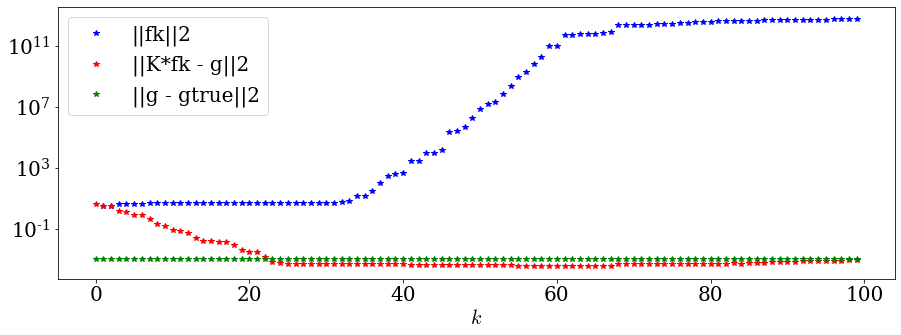

In [101]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.semilogy(x, fknorm, '*b', label = '||fk||2')
ax.semilogy(x, kfg_norm, '*r', label = '||K*fk - g||2')
ax.semilogy(x, gnorm, '*g', label = '||g - gtrue||2')
plt.xlabel('$k$')
plt.legend()
plt.show()

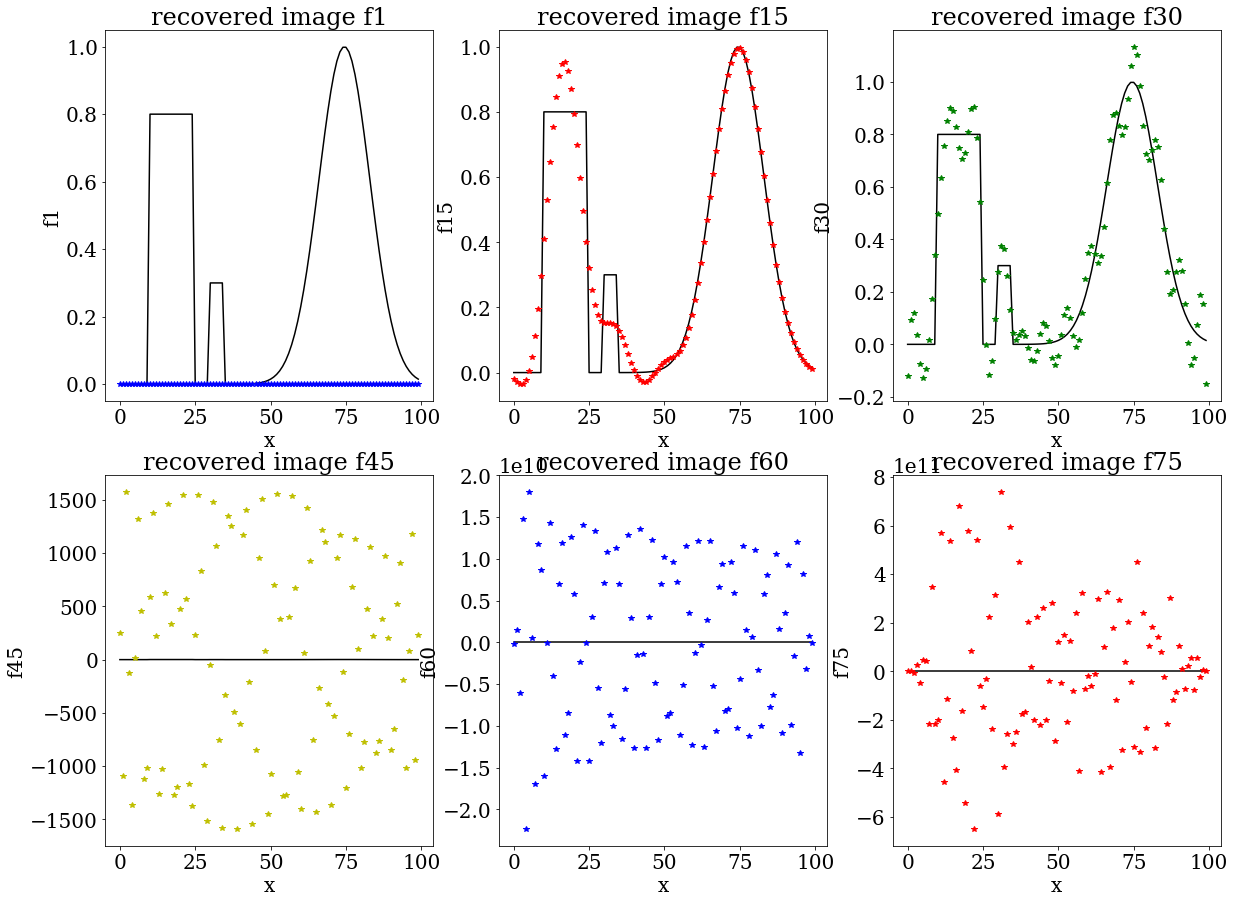

In [117]:
x = np.linspace(0, 99, 100)
fig, ax = plt.subplots(2, 3, figsize = (20, 15))
ax[0][0].plot(x, ftrue, '-k')
ax[0][0].plot(x, F_k[0], '*b')
ax[0][0].set_title('recovered image f1')
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('f1')

ax[0][1].plot(x, ftrue, '-k')
ax[0][1].plot(x, F_k[14], '*r')
ax[0][1].set_title('recovered image f15')
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('f15')

ax[0][2].plot(x, ftrue, '-k')
ax[0][2].plot(x, F_k[29], '*g')
ax[0][2].set_title('recovered image f30')
ax[0][2].set_xlabel('x')
ax[0][2].set_ylabel('f30')

ax[1][0].plot(x, ftrue, '-k')
ax[1][0].plot(x, F_k[44], '*y')
ax[1][0].set_title('recovered image f45')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('f45')

ax[1][1].plot(x, ftrue, '-k')
ax[1][1].plot(x, F_k[59], '*b')
ax[1][1].set_title('recovered image f60')
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('f60')

ax[1][2].plot(x, ftrue, '-k')
ax[1][2].plot(x, F_k[74], '*r')
ax[1][2].set_title('recovered image f75')
ax[1][2].set_xlabel('x')
ax[1][2].set_ylabel('f75')

plt.show()

iii

In [90]:
k_star = (kfg_norm - np.linalg.norm(gerr)).argmin()

In [91]:
k_star

60

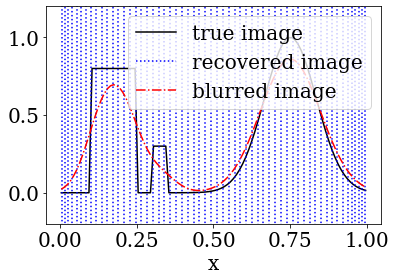

In [48]:
fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, F_k[k_star], ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='x')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()

The k* is not a good choice to approximate f.

iv

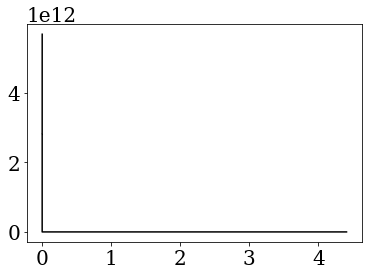

In [96]:
fig, ax = plt.subplots()
ax.plot(kfg_norm, fknorm, '-k')
plt.show()

In [92]:
lk_star =(abs(kfg_norm - 0.00035)).argmin()

In [93]:
lk_star

59

The K* should be around 59

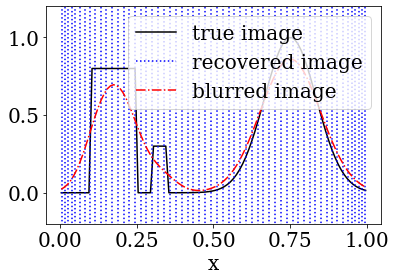

In [118]:
fig, ax = plt.subplots()
ax.plot(xi, ftrue, '-k')
ax.plot(xi, F_k[lk_star], ':b')
ax.plot(xi, gtrue, '-.r')
ax.legend(['true image','recovered image','blurred image'])
ax.set(xlabel='x')
ax.set_ylim(-0.2, 1.2)

#fig.savefig("denoise_1d_frecovered2.png")
plt.show()